In [16]:
import torch
import torchvision
from torchvision import transforms
import torch.utils.data

In [17]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

def load_dataset(train: bool) -> torch.utils.data.Dataset:
    return torchvision.datasets.CIFAR10(root='./data', train=train, transform=transform)

def create_data_loader(dataset: torch.utils.data.Dataset, batch_size: int, num_workers: int, shuffle: bool) -> torch.utils.data.DataLoader:
    return torch.utils.data.DataLoader(
        dataset, 
        batch_size=batch_size,
        shuffle=shuffle, 
        num_workers=num_workers,
    )

In [13]:
BATCH_SIZE = 4
NUM_WORKERS = 2

train_dataset = load_dataset(train=True)
test_dataset = load_dataset(train=False)
train_dataset, val_dataset = torch.utils.data.dataset.random_split(train_dataset, [0.8, 0.2])

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [15]:
train_data_loader = create_data_loader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
val_data_loader = create_data_loader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
test_data_loader = create_data_loader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [30]:
train_iter = iter(train_data_loader)

In [31]:
import matplotlib.pyplot as plt

In [54]:
batch, y_hat = next(train_iter)

In [55]:
example: torch.tensor = batch[0]

In [56]:
example.shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


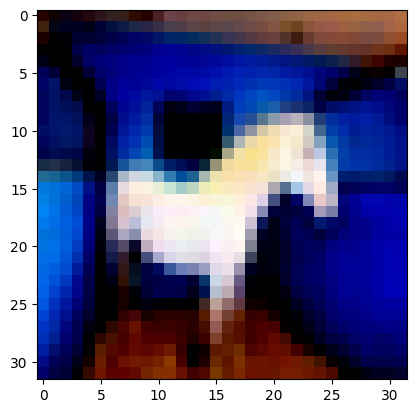

In [57]:
plt.imshow(example.permute(1, 2, 0))